In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


folder = "hw2data/train/"

#define the connections between the joints (skeleton) 
I = np.array(
        [1, 2, 3, 4, 5, 6, 1, 8, 9, 10, 11, 12, 1, 14, 15, 16, 17, 18, 19, 16, 21, 22, 23, 25, 26, 24, 28, 16, 30, 31,
         32, 33, 34, 35, 33, 37]) - 1
J = np.array(
        [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38]) - 1

/Users/emmazhou/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

array_list = []

movement_order = ['walking', 'jumping', 'running']

# Loop over the activity types in the certain order
for movement in movement_order:
    # Loop over the numbers 1 to 5 samples for each movement
    for i in range(1, 6):
        file_name = f"{movement}_{i}.npy"
        
        # Load the array from the file
        array = np.load(folder+file_name)
        array_list.append(array)

# Concatenate the arrays along the rows
compiled_data = np.concatenate(array_list, axis=1)

(114, 114) (114,) (1500, 1500)
Number of PCA modes needed for 70.0% energy: 2
Number of PCA modes needed for 80.0% energy: 3
Number of PCA modes needed for 90.0% energy: 5
Number of PCA modes needed for 95.0% energy: 7


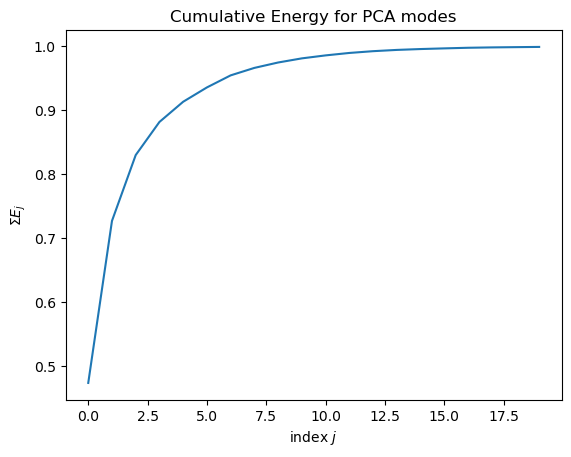

In [3]:
centered_data = compiled_data - np.mean(compiled_data, axis=1)[:, None]  #Use PCA, make the data centers at the mean point

dU, ds, dVt = np.linalg.svd(centered_data) # Apply SVD on data

print(dU.shape, ds.shape, dVt.shape )

E = np.power(ds,2)/np.sum(np.power(ds,2)) #Computes the ratio of each squared singular value to the total sum of
                                          #squared singular values. This gives the proportion of variance 
                                          #explained by each principal component.
plt.plot(np.cumsum(E)[:20])

plt.xlabel('index $j$')
plt.ylabel('$\Sigma E_j$')
plt.title("Cumulative Energy for PCA modes")
dU[:,1] = -dU[:, 1]

energy_thresholds = np.array([0.70, 0.80, 0.90, 0.95])

for threshold in energy_thresholds:
    num_modes_needed = np.argmax(np.cumsum(E) >= threshold) + 1
    print(f"Number of PCA modes needed for {threshold * 100}% energy: {num_modes_needed}")


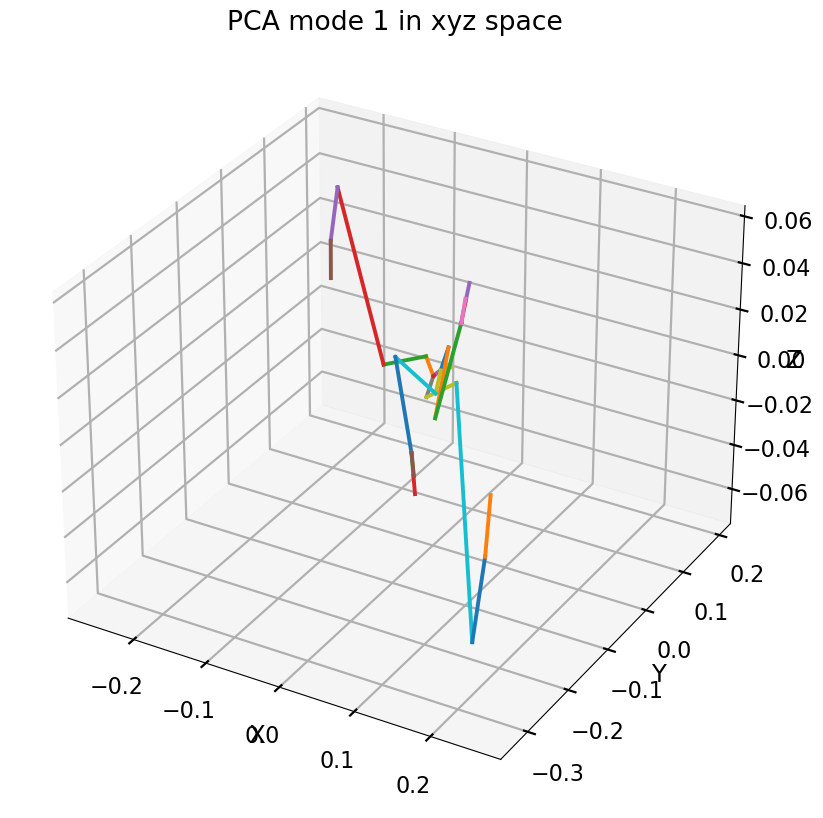

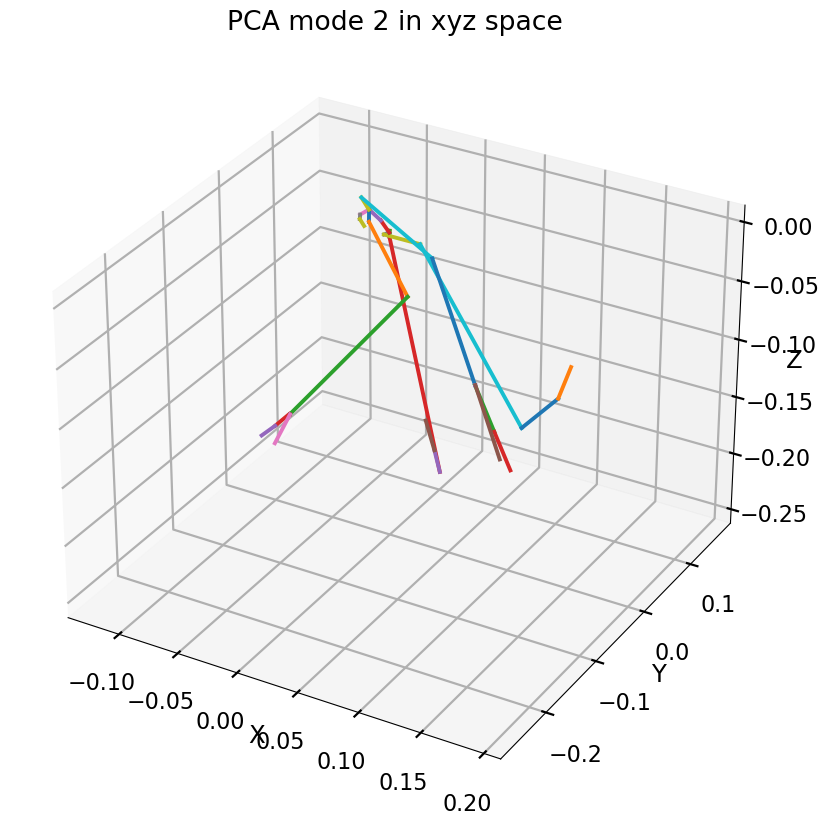

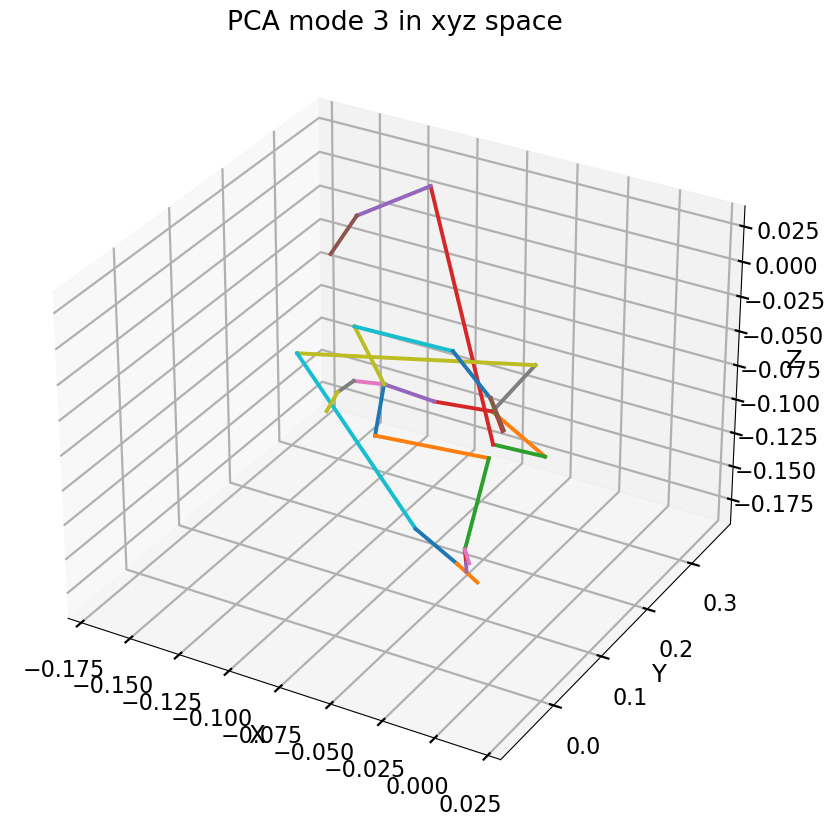

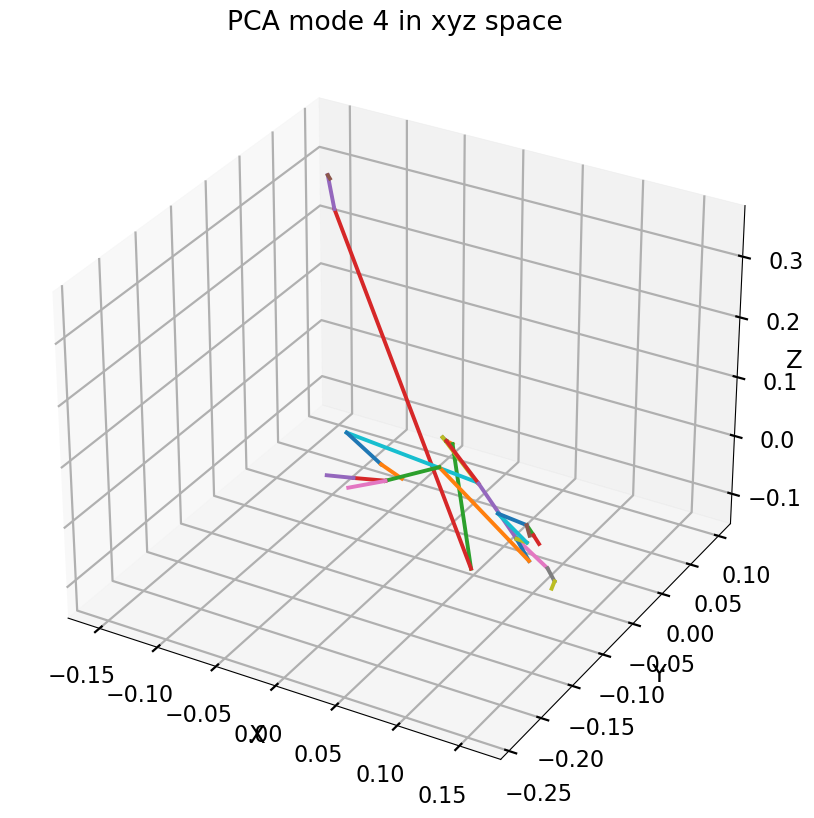

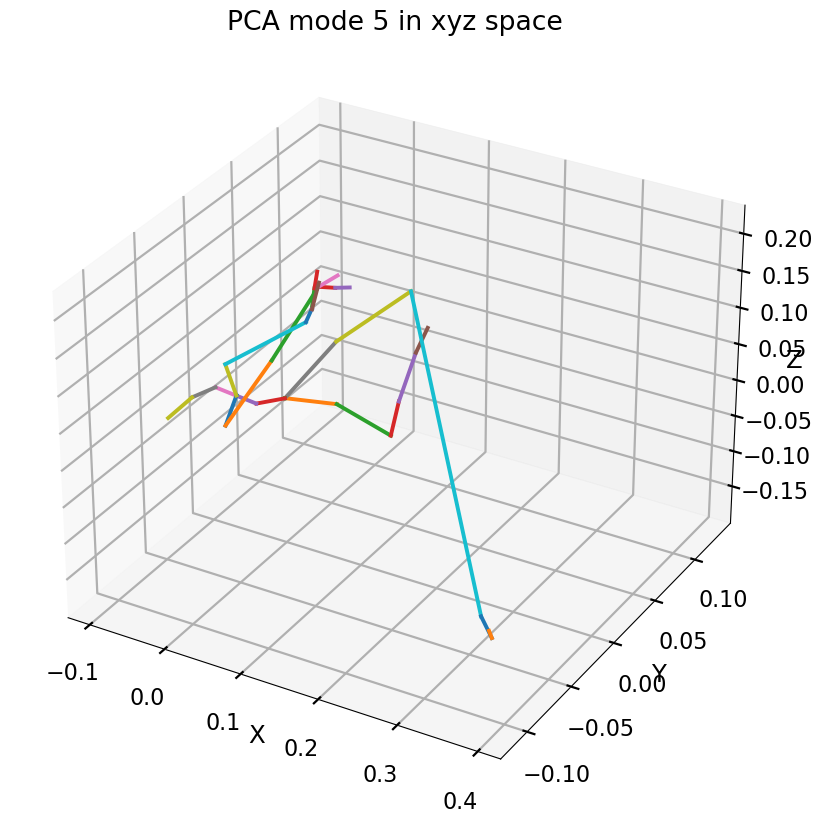

In [85]:
U_k5 = dU[:, :5] # Extract the first five PCA modes

U_k5_reshaped = U_k5.reshape((38, 3, -1))

for tind in range(0,U_k5_reshaped.shape[2]):
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    for ijind in range(0,I.shape[0]):
        xline = np.array([U_k5_reshaped[I[ijind],0,tind], U_k5_reshaped[J[ijind],0,tind]])
        yline = np.array([U_k5_reshaped[I[ijind],1,tind], U_k5_reshaped[J[ijind],1,tind]])
        zline = np.array([U_k5_reshaped[I[ijind],2,tind], U_k5_reshaped[J[ijind],2,tind]])
        # use plot if you'd like to plot skeleton with lines
        ax.plot(xline,yline,zline)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('PCA mode '+ str(tind + 1) + " in xyz space")
        
plt.show()


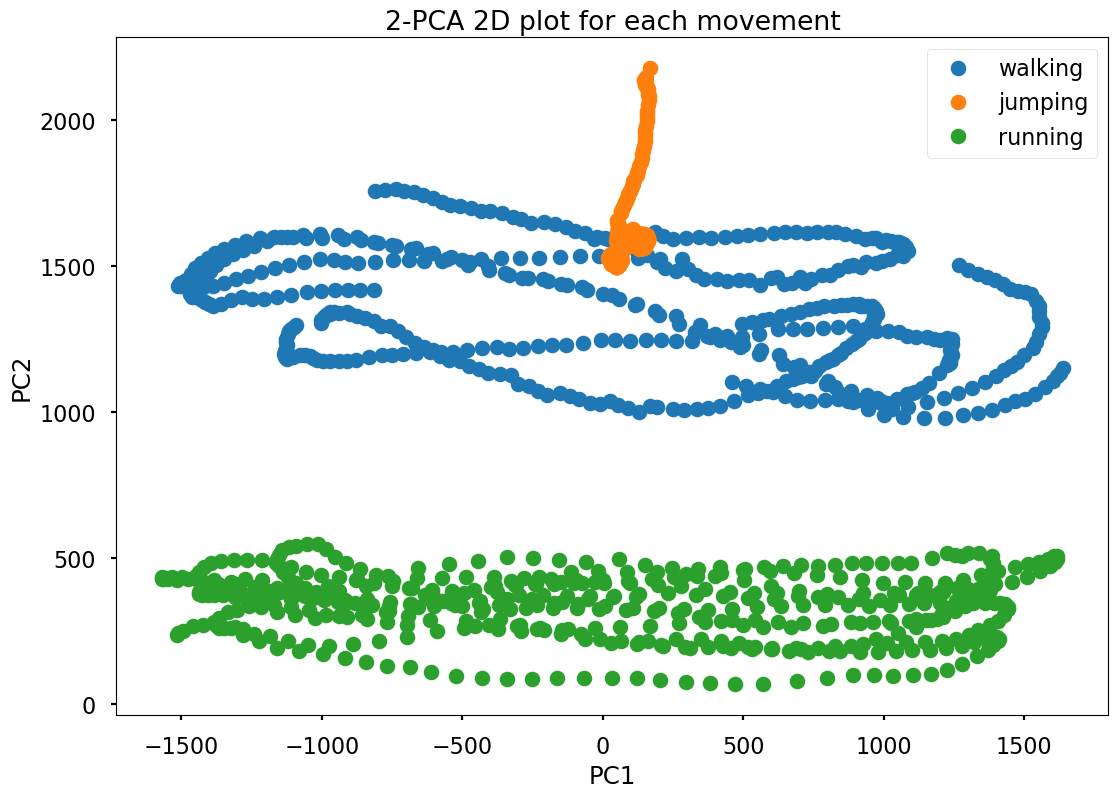

In [86]:
U_k2 = dU[:, :2]

projected_data_k2 = U_k2.T @ compiled_data #Project data to 2-PCA space

plt.plot(projected_data_k2[0,:500], projected_data_k2[1, :500], "o", label = "walking")
plt.plot(projected_data_k2[0,500:1000], projected_data_k2[1,500:1000], "o", label = "jumping")
plt.plot(projected_data_k2[0,1000:1500], projected_data_k2[1,1000:1500], "o", label = "running")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2-PCA 2D plot for each movement')
plt.legend()

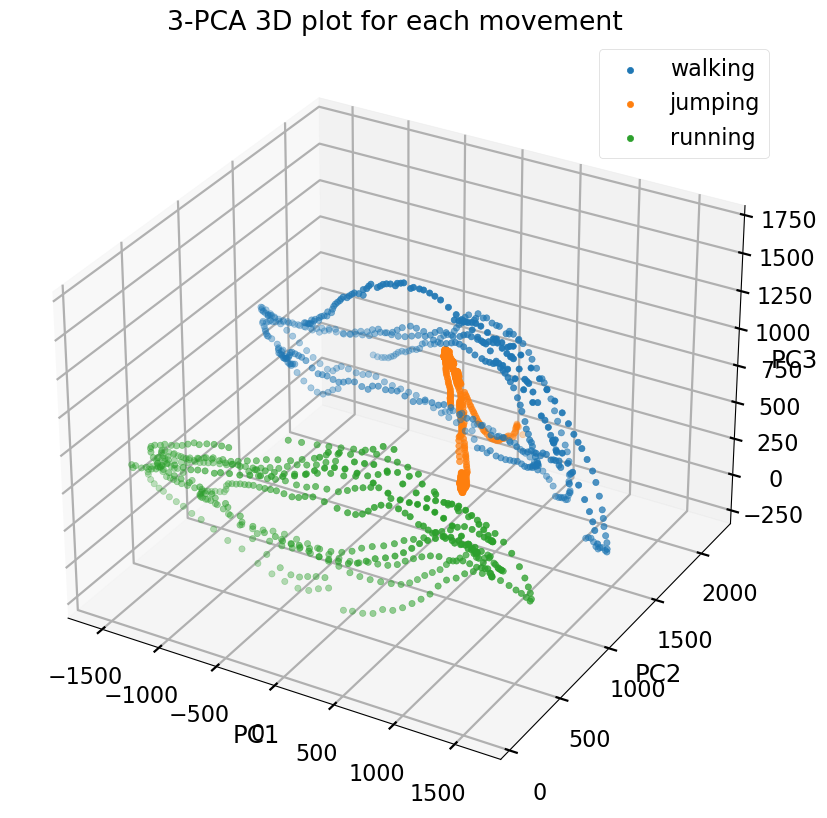

In [87]:


U_k3 = dU[:, :3]
projected_data_k3 = U_k3.T @ compiled_data #project the data to 3-pca space

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(projected_data_k3[0,:500], projected_data_k3[1, :500], projected_data_k3[2, :500], label="walking")
ax2.scatter(projected_data_k3[0,500:1000], projected_data_k3[1, 500:1000], projected_data_k3[2, 500:1000], label="jumping")
ax2.scatter(projected_data_k3[0,1000:1500], projected_data_k3[1, 1000:1500], projected_data_k3[2, 1000:1500], label="running")


ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.legend()
plt.title('3-PCA 3D plot for each movement')
plt.show()

In [88]:
num_samples_per_move = 500
num_classes = 3

ground_truth_labels = np.repeat(np.arange(3), 500)

labeled_data_dict = {}

# Use for loop to assign each data in X_train to the ground truth label, for better computing the centroid
for i in range(num_classes):
    start_index = i * num_samples_per_move
    end_index = (i + 1) * num_samples_per_move
    labeled_data_dict[i] = compiled_data[:, start_index:end_index]


In [89]:
array_list_test = []
folder_test = "hw2data/test/"
# Specify the order of activities

# Loop over the activity types to load the data
for movement in movement_order:
    
    file_name_test = f"{movement}_1t.npy"

    # Load the array from the file
    array_test = np.load(folder_test+file_name_test)
    array_list_test.append(array_test)

# Concatenate the arrays along rows
compiled_data_test = np.concatenate(array_list_test, axis=1)

centered_data_test = compiled_data_test - np.mean(compiled_data_test, axis=1)[:, None]  #Use PCA, make the data centers at the mean point
dU_test, ds_test, dVt_test = np.linalg.svd(centered_data_test) # Apply SVD on data
dU_test[:,1] = -dU_test[:, 1]

num_samples_per_move_test = 100
num_classes_test = 3
ground_truth_labels_test = np.repeat(np.arange(3), num_samples_per_move_test)

for k =  1 The accuracy for test data is  0.4866666666666667
for k =  2 The accuracy for test data is  0.9833333333333333
for k =  3 The accuracy for test data is  0.9233333333333333
for k =  4 The accuracy for test data is  0.7466666666666667
for k =  5 The accuracy for test data is  0.9166666666666666
for k =  6 The accuracy for test data is  0.7166666666666667
for k =  7 The accuracy for test data is  0.9433333333333334
for k =  8 The accuracy for test data is  0.93
for k =  9 The accuracy for test data is  0.9433333333333334
for k =  10 The accuracy for test data is  0.9433333333333334
for k =  11 The accuracy for test data is  0.9533333333333334
for k =  12 The accuracy for test data is  0.9533333333333334
for k =  13 The accuracy for test data is  0.9533333333333334
for k =  14 The accuracy for test data is  0.9533333333333334
for k =  15 The accuracy for test data is  0.9533333333333334
for k =  16 The accuracy for test data is  0.9533333333333334
for k =  17 The accuracy for te

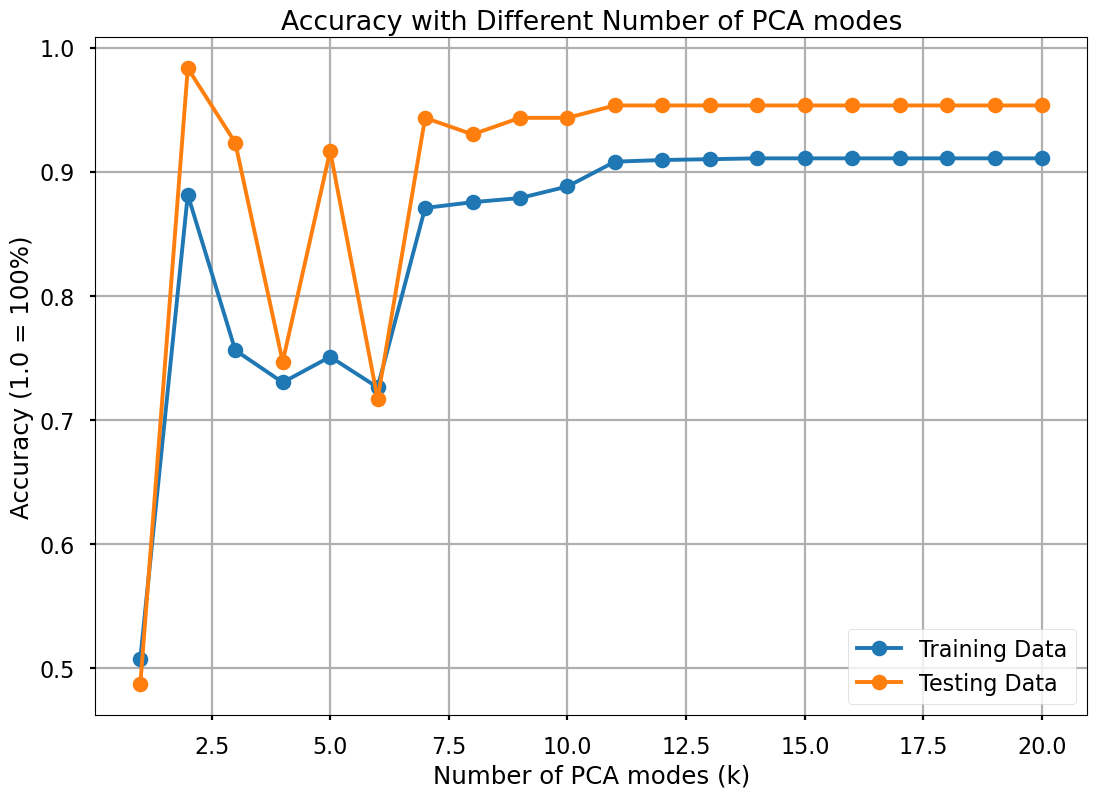

In [90]:

k_values = range(1, 21)
accuracy_values_train = []
accuracy_values_test = []

# Calculate accuracy for different k values. Loop over.
for num_of_k in k_values:
    dU_k = dU[:, :num_of_k]
    dU_k_test = dU_test[:, :num_of_k]

    centroid_dict = {}
    for label, data in labeled_data_dict.items():
        projected_kdata_permove = dU_k.T @ labeled_data_dict[label]
        centroid_position = np.mean(projected_kdata_permove, axis=1)
        centroid_dict[label] = centroid_position
    
    # Compute accuracy for Train data
    projected_k_data = dU_k.T @ compiled_data

    trained_labels = np.zeros_like(ground_truth_labels)
    possible_labels = np.array([0, 1, 2])

    for i in range(projected_k_data.shape[1]):
        distances = [np.linalg.norm(projected_k_data[:, i] - centroid_dict[label]) for label in possible_labels]
        trained_labels[i] = possible_labels[np.argmin(distances)]

    accuracy_train = accuracy_score(ground_truth_labels, trained_labels)
#     print("for k = ", num_of_k, "The accuracy for train data is ", accuracy_train)
    accuracy_values_train.append(accuracy_train)

    # Compute accuracy for Test data
    projected_k_data_test = dU_k.T @ compiled_data_test

    test_labels = np.zeros_like(ground_truth_labels_test)

    for i in range(projected_k_data_test.shape[1]):
        distances_test = [np.linalg.norm(projected_k_data_test[:, i] - centroid_dict[label]) for label in possible_labels]
        test_labels[i] = possible_labels[np.argmin(distances_test)]

    accuracy_test = accuracy_score(ground_truth_labels_test, test_labels)
    print("for k = ", num_of_k, "The accuracy for test data is ", accuracy_test)
    accuracy_values_test.append(accuracy_test)

# Plot the accuracy values for training and testing data
plt.plot(k_values, accuracy_values_train, marker='o', label='Training Data')
plt.plot(k_values, accuracy_values_test, marker='o', label='Testing Data')
plt.xlabel('Number of PCA modes (k)')
plt.ylabel('Accuracy (1.0 = 100%)')
plt.title('Accuracy with Different Number of PCA modes')
plt.legend()
plt.grid(True)
plt.show()
